In [1]:
import pandas as pd 
import geopandas as gpd
import matplotlib.pyplot as plt
from shapely.geometry import Point
import numpy as np

In [2]:
df = gpd.read_file('softsites_cd.csv', header = True, index_col = False)
cd = gpd.read_file('http://services5.arcgis.com/GfwWNkhOj9bNBqoJ/arcgis/rest/services/nycd/FeatureServer/0/query?where=1=1&outFields=*&outSR=4326&f=geojson')

In [3]:
df = df[df.cd != '']
df = df[df.softsites_new != '']
df = df[df.softsites != '']
df = df.drop(['geometry','diff'], axis = 1)

In [4]:
df.cd = [int(i) for i in df.cd]
df.softsites_new = [float(i) for i in df.softsites_new]
df.softsites = [float(i) for i in df.softsites]
df['diff'] = df.softsites_new - df.softsites

In [5]:
df.head()

,field_1,cd,softsites_new,softsites,diff
0,0,307,2864.0,2866.0,-2.0
1,1,205,1252.0,1250.0,2.0
2,2,483,2.0,2.0,0.0
3,3,317,4578.0,4842.0,-264.0
4,4,101,45.0,45.0,0.0


In [6]:
cd.head()

,OBJECTID,BoroCD,Shape__Area,Shape__Length,geometry
0,1,311,1.031781e+08,51549.206879,"POLYGON ((-73.9729957711089 40.6088223787091, ..."
1,2,313,8.819562e+07,65820.057464,"POLYGON ((-73.98372296075711 40.5958293126875,..."
2,3,312,9.952558e+07,52245.811474,"POLYGON ((-73.97139775062961 40.6482660313929,..."
3,4,304,5.666315e+07,37008.060180,"POLYGON ((-73.8964676619632 40.6823446767505, ..."
4,5,209,1.142664e+08,62239.353527,"POLYGON ((-73.8397962880056 40.8356274933315, ..."


In [7]:
df = df.merge(cd[['BoroCD', 'geometry']], left_on='cd', right_on='BoroCD')
df.crs = {'init' :'epsg:4326'}
df = df.to_crs({'init' :'epsg:2263'})

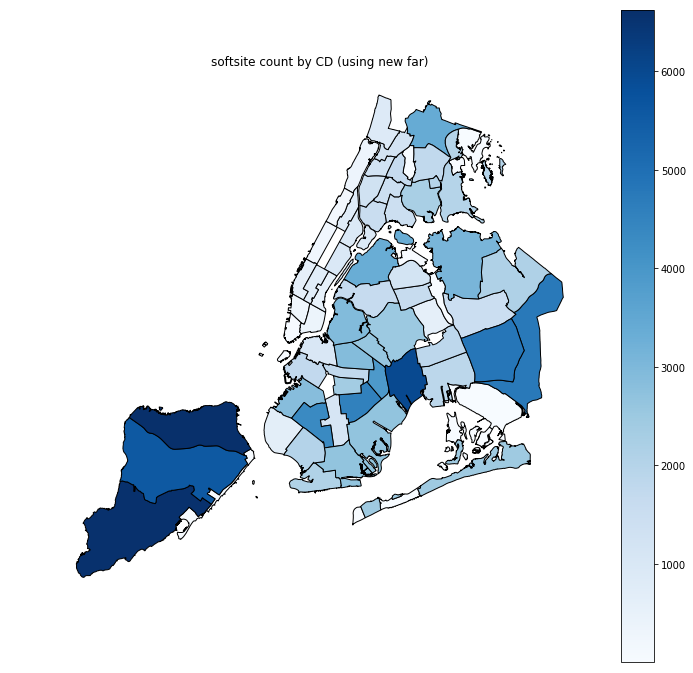

In [8]:
df.plot(column='softsites_new', cmap='Blues', legend = True, figsize=(12, 12), edgecolor='black')
plt.axis('off')
plt.title('softsite count by CD (using new far)')
plt.show()

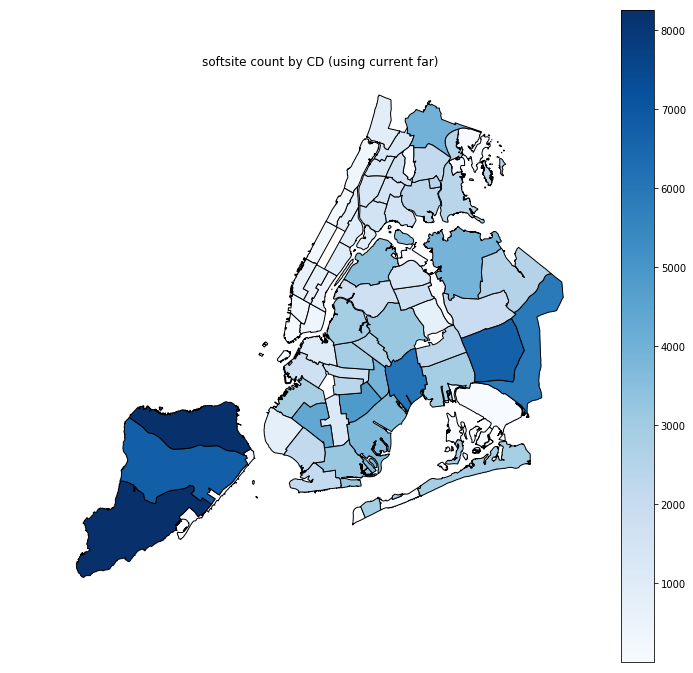

In [10]:
df.plot(column='softsites', cmap='Blues', legend = True, figsize=(12, 12),  edgecolor='black')
plt.axis('off')
plt.title('softsite count by CD (using current far)')
plt.show()

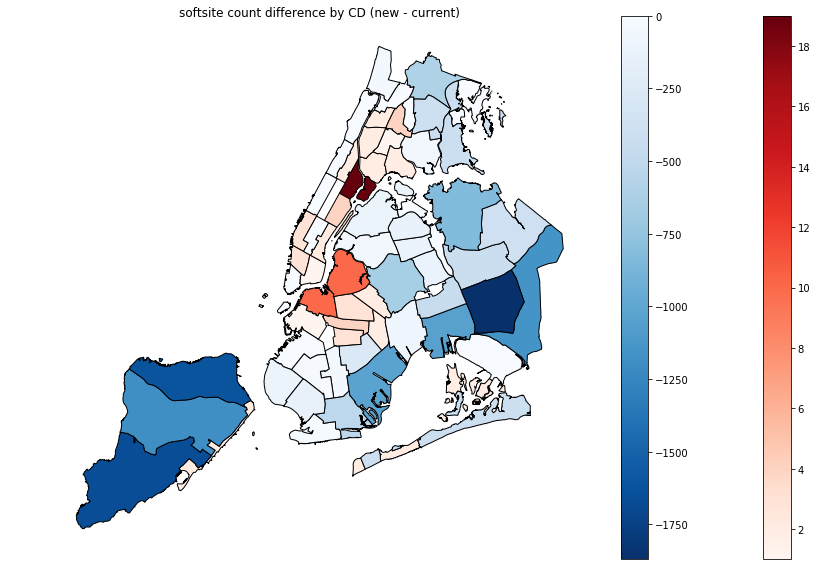

In [11]:
base = df[df['diff'] > 0].plot(column='diff', cmap='Reds', legend = True, figsize=(15, 10),  edgecolor='black')
df[df['diff'] <= 0].plot(column='diff', ax=base, cmap='Blues_r', legend = True,  edgecolor='black')
plt.axis('off')
plt.title('softsite count difference by CD (new - current)')
plt.show()

In [50]:
def plot_cd_softsites(cd_num, file):
    cd = gpd.read_file(file, header = True, index_col = False)
    cd.xcoord = [float(i) for i in cd.xcoord]
    cd.ycoord = [float(i) for i in cd.ycoord]
    cd.geometry = [Point(i) for i in zip(cd.xcoord, cd.ycoord)]
    base = df[df.cd == cd_num].plot(color='darkgrey',legend=True, figsize=(12, 12))
    cd[cd.pctunbuilt == cd.pctunbuilt_new].plot(color="white", ax=base, markersize = 10, alpha = 0.5, label='unchanged softsites')
    cd[cd.pctunbuilt > cd.pctunbuilt_new].plot(color="blue", ax=base, markersize = 10, alpha =0.6, label='no longer softsites')
    cd[cd.pctunbuilt < cd.pctunbuilt_new].plot(color="red", ax=base, markersize = 10, alpha = 0.6, label='new softsites')
    plt.axis('off')
    plt.legend()
    plt.show()

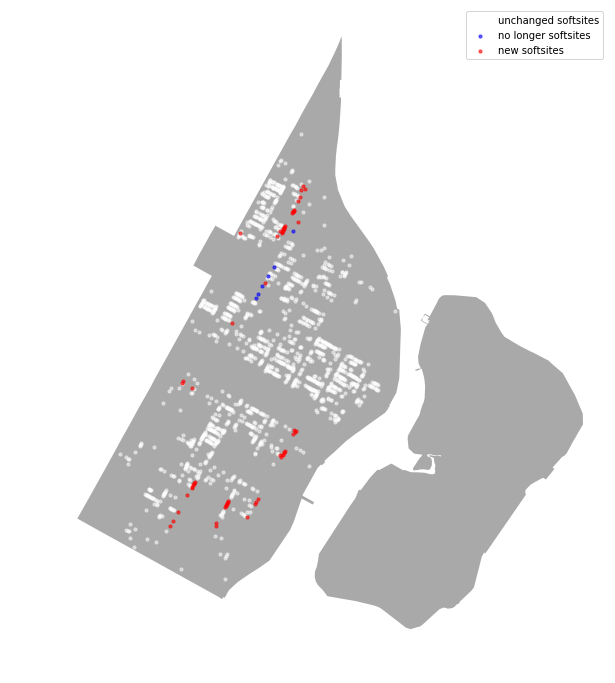

In [51]:
plot_cd_softsites(111, 'cd111_softsites.csv')

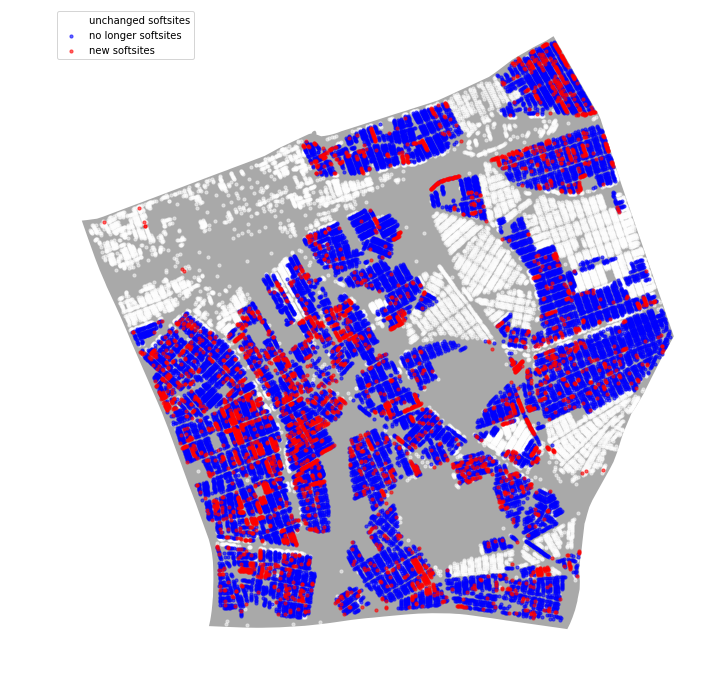

In [43]:
plot_cd_softsites(412, 'cd412_softsites.csv')